<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса для размещения объявлений о недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости и установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Основными этапами нашего проекта станут:

* Изучение предоставленных данных
* Предобработка данных
* Расчеты и добавление результатов в таблицу
* Исследовательский анализ данных
* Общий вывод

Проект выполнен в **Jupyter Notebook**, версия сервера блокнотов: 6.1.4. Версия **Python** 3.7.8.  
В проекте использованы библиотеки **Pandas**, **MatPlotLib** а также модуль **IPython**.

## Изучение данных из файла

In [1]:
# Загрузим необходимые библиотеки.
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
# В таблице немало столбцов. 
# Для удобства включим отображение всех столбцов.
pd.set_option('display.max_columns', None)
# Разделим столбцы при помощи табуляции.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

**Изучение таблицы**  

При первом просмотре таблицы была выявлена необходимость замены разделителя колонок. В качестве параметра `sep` в методе `read_csv` были использованы символы `\t`, означающие табуляцию.  
  
**Состав таблицы**

После разделения колонок была изучена архитектура данных. Данные сервиса представляют из себя таблицу, в которой 22 столбца и 23699 строк. 2 столбца имеют логический тип данных (`bool`), 3 столбца имеют целочисленный тип данных (`int64`) и 17 столбцов имеют текстовый или смешанный тип данных (`object`).  
  
**Пропуски**  

Проведен анализ наличия пропусков в столбцах таблицы.  
В 14 столбцах типа `object` имеются пропуски: 
* **ceiling_height**
* **floors_total**
* **living_area**
* **is_apartment**
* **kitchen_area**
* **balcony**
* **locality_name**
* **airports_nearest**
* **cityCenters_nearest**
* **parks_around3000**
* **parks_nearest**
* **ponds_around3000**
* **ponds_nearest**
* **days_exposition**

В столбце **floor** имеются пропуски типа `int64`.

## Предобработка данных

In [2]:
# Производим замену NaN-значений на 0 в столбце balcony.
data['balcony'] = data['balcony'].fillna(0)
# Избавляемся от строк с NaN-значениями в столбце locality_name.
data = data.dropna(subset=['locality_name']) 
# В таблице есть квартиры с высотой потолков от 10.3 до 32 м. 
# Скорее всего автор объявления ошибся в 10 раз. 
# Поправим это функцией height_correction.
def height_correction(height):
    
    if 10.3 < height <= 32:
        return height/10
    return height

data['ceiling_height'] = data['ceiling_height'].apply(height_correction)
# Производим замену типа данных с object на datetime
# в столбце first_day_exposition.
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], 
    format='%Y.%m.%d'
)
# Производим замену типа данных с float на int 
# в столбцах balcony и last_price.
data = data.astype({'balcony':'int', 'last_price':'int'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_aroun

### Вывод

###### <u>Столбцы, в которых произведена замена пропущенных значений</u> ######  

    
<br /><li>В столбце <strong>balcony</strong> произведена замена NaN-значений на 0.
    <p><strong>Предполагаемая причина появления пропусков:</strong> Очевидно, что NaN-значения образовались, так как автор объявления ничего не указал в нём о количестве балконов, так как их нет в квартире.<p/></li>

###### <u>Столбцы, в которых замена пропущенных значений не производилась</u> ######

<br /><li>В столбце <strong>days_exposition</strong> замена NaN-значений не производилась. Изначально была гипотеза, что данные объявления были закрыты в течение суток с момента опубликования ввиду удачного расположения жилых домов, и, как следствие, быстрого начала оформления сделки о покупке-продаже квартиры. И такие значения заносились в базу данных, как NaN. Но позже из-за отстуствия объективных доказательств от гипотезы пришлось отказаться. Без искажения статистической картины корректную замену NaN-значений в данном столбце подобрать невозможно.
<p><strong>Предполагаемая причина появления пропусков:</strong> возможно программа, аккумулирующая данные, не сразу фиксировала срок закрытия объявления. Стоит обратиться к коллегам для уточнения данного момента.
    
<br /><li>В столбцах <strong>parks_nearest</strong> и <strong>ponds_nearest</strong> замена NaN-значений не проводилась, так как нет подходящих значений для замены, а значение 0 в данном столбце можно трактовать как максимально близкое расстояние парка или водоема к дому. В данном случае, если парка или водоема вблизи дома нет, то логичнее указать не 0, а пропуск (NaN). Например, если будет указан 0, то можно подумать, что жилой дом находится на территории парка, что введет анализирующего в заблуждение (такие дома есть. Например, по адресу Санкт-Петербург, Институтский пер.)</li>
<p><strong>Предполагаемые причины появления пропусков:</strong>
<ul><li>Населенный пункт находится за пределами г. Санкт-Петербурга. Очевидно данный параметр рассчитывается, только если квартира находится в пределах города.</li> 
    <li>Количество водоемов в радиусе 3000 км равно 0.</li></ul> 
         
<li>В столбцах <strong>parks_around3000</strong> и <strong>ponds_around3000</strong> замена NaN-значений не проводилась, так как они встречаются или когда квартира находится вне границ г. Санкт-Петербурга (но это же не означает, что вблизи этих домов нет парков и водоёмов), или в 61 объявлении, где вообще нет никаких географических данных, но при этом названием населенного пункта является г. Санкт-Петербург.</li>
<p><strong>Предполагаемые причины появления пропусков:</strong>
<ul><li>Населенный пункт находится за пределами г. Санкт-Петербурга. Очевидно данный географический параметр рассчитывается, только если квартира находится в пределах города.</li> 
    <li>Причина, по которой данный параметр остался в виде NaN в 61 объявлении, где указан г. Санкт-Петербург, остается неизвестной.</li></ul> 
    
   <li>В столбцах <strong>airports_nearest</strong> и <strong>cityCenters_nearest</strong> пропуски заменять нецелесообразно, так как нет подходящих значений для замены, а значение 0 не подходит для измерения расстояния в подобных массивах информации (стоит отметить, что в одной строке присутствует значение 0 в столбце <strong>airports_nearest</strong>, автор проекта считает, что это ошибка). Очевидно, что чаще всего NaN-значения встречаются в объявлениях о продаже квартир, находящихся за пределами г. Санкт-Петербурга, но тем не менее они встречаются и в "петербургских" объявлениях.</li>

<li>В таблице имеется 49 строк, в которых стоит NaN-значение в столбце <strong>locality_name</strong>. У 8 из них нет никаких географических данных. У 41 из них есть признаки того, что эти объявления о продаже квартир в г. Санкт-Петербурге (есть географические данные, а они считаются только для Санкт-Петербурга). При этом мы не можем произвести замену этих значений на "Санкт-Петербург", так как в этой таблице некоторые районы Петербурга выделены отдельно и обозначаются как самостоятельный населенный пункт (например, Пушкин, Колпино, Петергоф. Это всё районы Петербурга). Таким образом мы не знаем точно, к какому населенному пункту нужно отнести эту 41 строку. Принято решение избавиться от этих строк.</li>
 
<li>В столбцах <strong>ceiling_height</strong>, <strong>floors_total</strong>, <strong>living_area</strong>, <strong>kitchen_area</strong>, <strong>is_apartment</strong>  произвести корректную замену NaN-значений без риска искажений данных невозможно. Вероятнее всего пропуски в этих стольбцах образовались потому, что заполнение этих данных при создании объявления какое-то время было необязательным.</li>

**Столбцы, в которых произведена замена типа данных**  

В столбцах **last_price**, **balcony** произведена замена типа данных с `float` на `int`, так как эти данные нет смысла хранить в вещественном виде.
В столбце **first_day_exposition** заменен тип данных с `object` на `datetime` (без отображения времени. В этом нет смысла в данном случае, так как во всех случаях указано время 00:00:00).

NB! Изменение типа данных с `float` на `int` в подходящих для этого столбцах, но где присутствуют NaN-значения, невозможно, так как при наличии хотя бы одного вещественного значения в числовом наборе данных типа `Series`, все остальные данные в данном `Series` тоже будут типа `float`.

## Расчёты и добавление результатов в таблицу

In [3]:
# Рассчитаем цену квадратного метра.
data['sqr_meter_price'] = (
    data['last_price'] / data['total_area']
).astype(int)
# Добавим столбцы дня недели, месяца и года.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# Добавим словесные категории этажам при помощи функции floor_name.
def floor_name(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# Для последующего исследовательского анализа данных нам пригодятся 
# численные категории этажей:
# 0 - первый этаж, 1 - последний этаж, 2 - другой этаж.
def floor_category(floor_names):
    
    if floor_names == 'первый':
        return 0
    elif floor_names == 'последний':
        return 1
    return 2

In [4]:
# Применим функции.
data['flat_floor'] = data.apply(floor_name, axis=1)
data['floor_categories'] = data['flat_floor'].apply(floor_category)
# Изучив план выполнения проекта, стало понятно, что необходимо
# добавить столбец с расстоянием до центра города в километрах,
# а также рассчитать удельную цену квартиры за 1 километр.
data['cityCenters_nearest_km'] = (
    data['cityCenters_nearest'] / 1000
).round()
data['price_per_km'] = (
    data['last_price'] / data['cityCenters_nearest_km']
).round()
# Посчитаем доли жилой площади и площади кухни от общей площади.
data['living_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,weekday,month,year,flat_floor,floor_categories,cityCenters_nearest_km,price_per_km,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,2,16.0,812500.0,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0,19.0,176316.0,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,2,14.0,371143.0,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,2,7.0,9271429.0,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,2,8.0,1250000.0,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другой,2,4.0,2425000.0,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542,0,1,2018,другой,2,NaN,NaN,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091,6,2,2018,первый,0,NaN,NaN,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другой,2,10.0,1147500.0,NaN,0.303583


### Вывод
Для последующего исследовательского анализа данных были проведены необходимые расчеты и добавления столбцов в таблицу.
<br /><li>Рассчитана цена квадратного метра квартир. Она отражена в столбце <strong>sqr_meter_price</strong>.
<br /><li>В столбцах <strong>weekday</strong><strong>, month</strong><strong>, year</strong> отражены день недели, месяц и год опубликования объявления.
<br /><li>Добавлены словесные и числовые категории этажей, на которых расположены квартиры. Эти данные находятся в столбцах <strong>flat_floor</strong> и <strong>floor_categories</strong> соответственно. Они пригодятся при исследовательском анализе данных.
<br /><li>Добавлены столбцы <strong>cityCenters_nearest_km</strong> и <strong>price_per_km</strong>, в которых хранятся данные о расстоянии от квартиры до центра города в километрах (изначально в таблице был столбец с подобной информацией в метрах) и удельная цена квартиры за 1 километр до центра города соответственно. Они пригодятся при исследовательском анализе данных.
<br /><li>Добавлены столбцы <strong>living_total_ratio</strong> и <strong>kitchen_total_ratio</strong>, в которых хранятся доли жилой площади и площади кухни от общей площади. Они пригодятся при исследовательском анализе данных.

## Исследовательский анализ данных

Автоматизировать построение гистограмм всех параметров (число комнат, цена, высота потолков, площадь) не получится, так как для каждого из них необходимо вручную регулировать такие параметры, как количество корзин и масштаб гистограммы (чтобы отображение было наглядным). Гистограммы построим вручную.

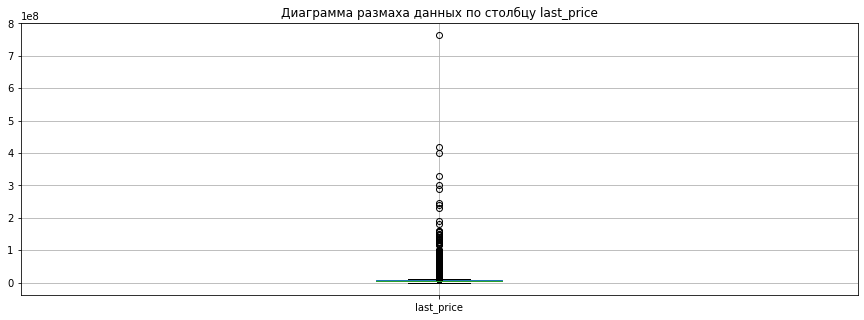

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

4500000     342
3500000     289
4300000     260
4000000     260
4200000     258
           ... 
6519750       1
4574160       1
9899000       1
2346000       1
12288000      1
Name: last_price, Length: 2964, dtype: int64

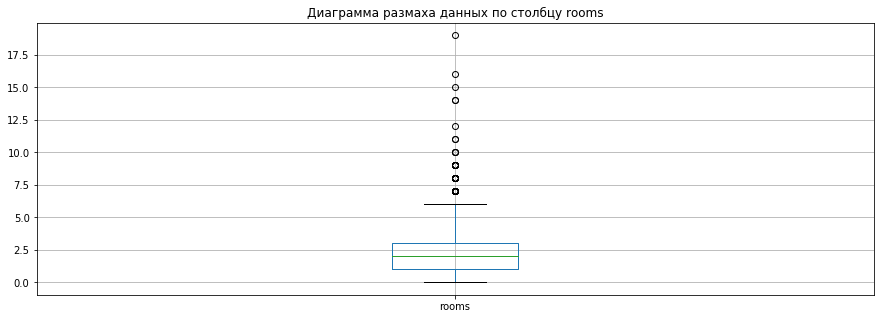

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

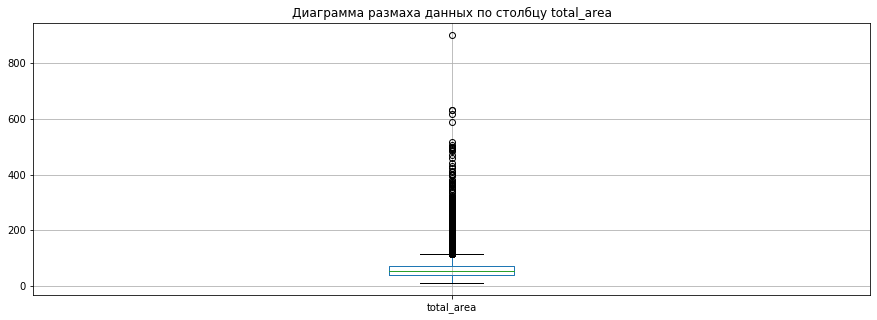

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

45.00    419
42.00    383
60.00    346
31.00    346
44.00    343
        ... 
54.75      1
45.85      1
44.18      1
59.83      1
23.55      1
Name: total_area, Length: 2181, dtype: int64

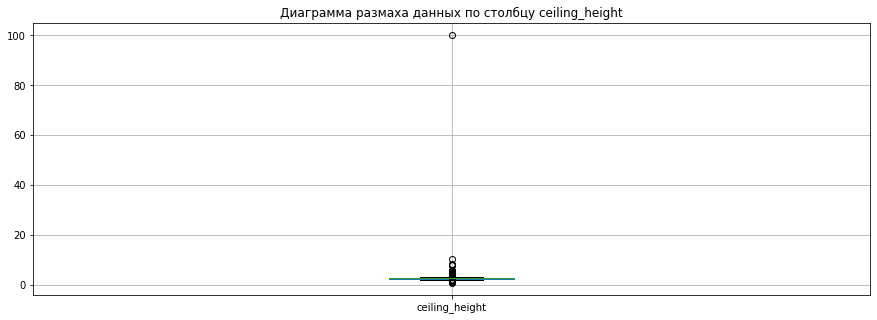

count    14490.000000
mean         2.734697
std          0.861916
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

2.50    3522
2.60    1646
2.70    1580
3.00    1109
2.80     993
        ... 
2.26       1
4.80       1
3.76       1
3.43       1
4.14       1
Name: ceiling_height, Length: 176, dtype: int64

In [5]:
# Напишем функцию description, позволяющую быстро исследовать значения.
def description(table, parameter):
    
    table.plot(y=parameter, 
               kind='box', 
               grid=True, 
               figsize=(15,5)
              )
    plt.title('Диаграмма размаха данных по столбцу ' + str(parameter))
    plt.show()
    display(table[parameter].describe())
    display(table[parameter].value_counts())

# В переменной parameters хранятся значения, которые будем исследовать.
parameters = ['last_price', 'rooms', 'total_area', 'ceiling_height']    
for element in parameters:
    description(data, element)

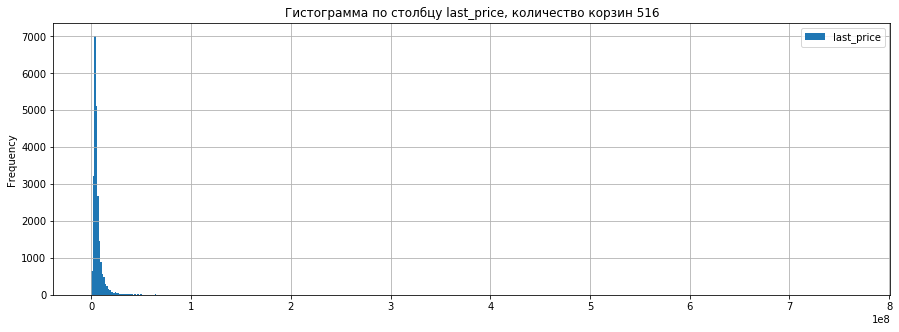

In [6]:
# Теперь построим гистограммы для каждого параметра. 
# К сожалению, масштабированием занимаемся вручную. 
# Для внимательного изучения данных необходимо 
# разбивать гистограммы на области.
# Начнем с цены.
data.plot(y='last_price', 
          kind='hist', 
          grid=True, 
          bins=516, 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу last_price, количество корзин 516')
plt.show()

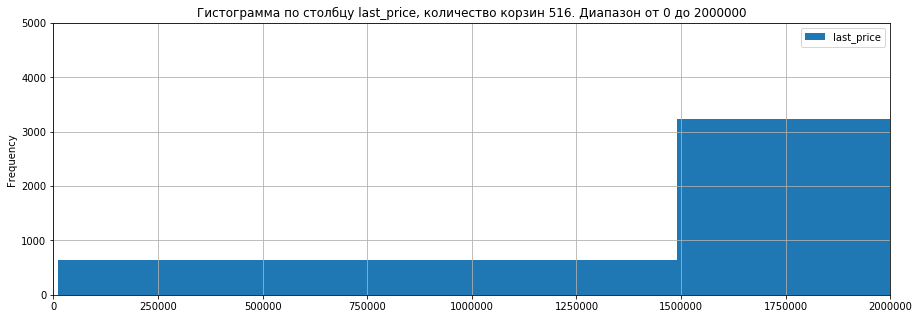

In [7]:
# Изменим границы.
data.plot(y='last_price', 
          kind='hist', 
          grid=True, 
          bins=516, 
          xlim=(0,2000000), 
          ylim=(0,5000), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу last_price, количество корзин 516.' 
          ' Диапазон от 0 до 2000000')
plt.show()

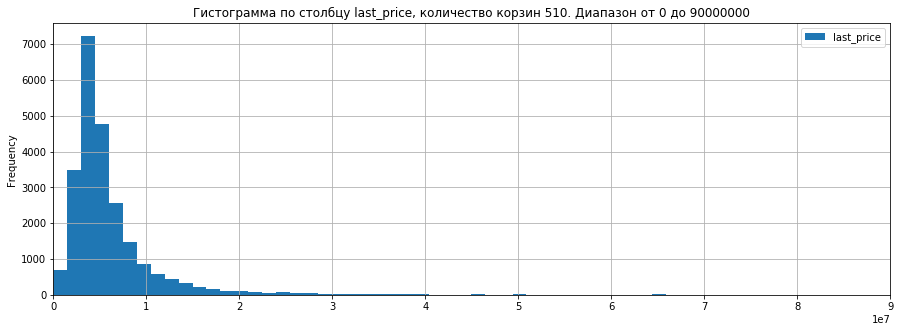

In [8]:
# Изменим границы и количество корзин.
data.plot(y='last_price', 
          kind='hist',
          grid=True, 
          bins=510, 
          xlim=(0,90000000), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу last_price, количество корзин 510.' 
          ' Диапазон от 0 до 90000000')
plt.show()

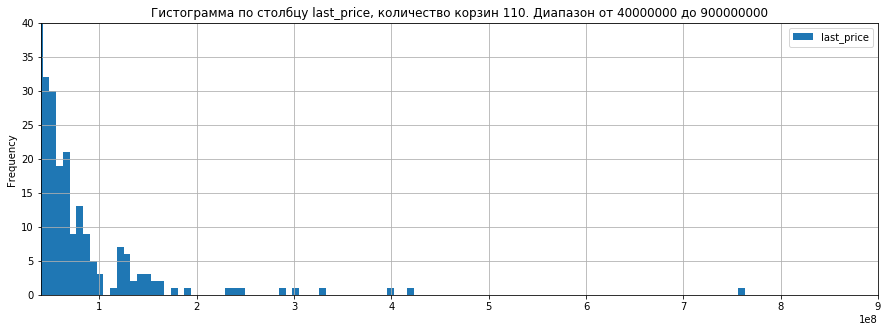

In [9]:
# Изменим границы и количество корзин.
data.plot(y='last_price', 
          kind='hist', 
          grid=True, 
          bins=110, 
          xlim=(40000000,900000000), 
          ylim=(0,40), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу last_price, количество корзин 110.' 
          ' Диапазон от 40000000 до 900000000')
plt.show()

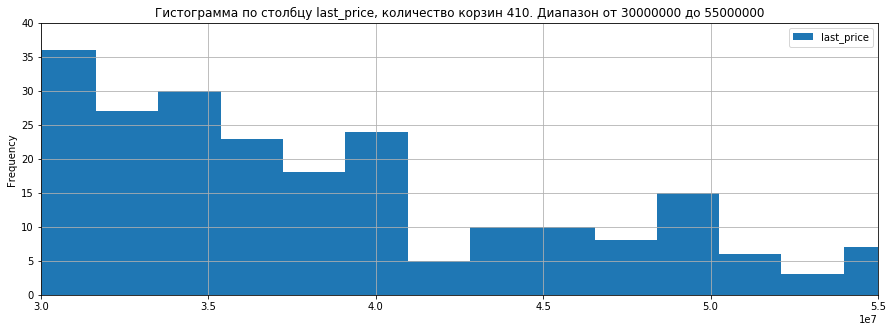

In [10]:
# Изменим границы и количество корзин.
data.plot(y='last_price', 
          kind='hist', 
          grid=True, 
          bins=410, 
          xlim=(30000000,55000000), 
          ylim=(0,40), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу last_price, количество корзин 410.'
          ' Диапазон от 30000000 до 55000000')
plt.show()

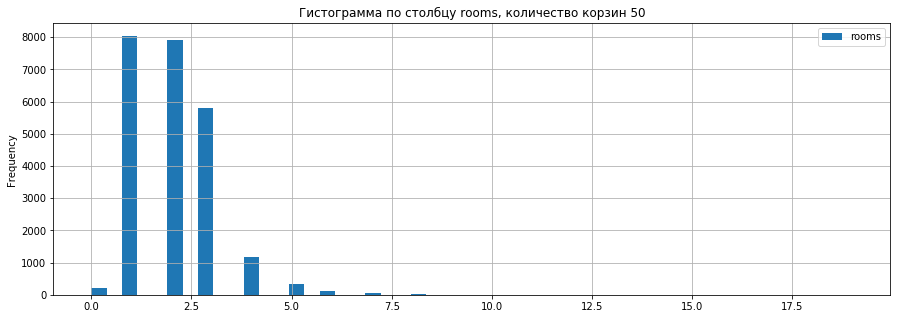

In [11]:
# Теперь количество комнат.
data.plot(y='rooms', 
          kind='hist', 
          grid=True, 
          bins=50, 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу rooms, количество корзин 50')
plt.show()

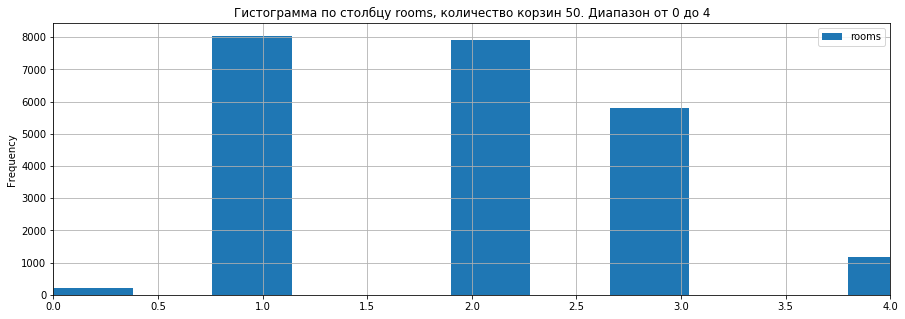

In [12]:
# Изменим границы и количество корзин.
data.plot(y='rooms', 
          kind='hist', 
          grid=True, 
          bins=50, 
          xlim=(0,4), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу rooms, количество корзин 50.'
          ' Диапазон от 0 до 4')
plt.show()

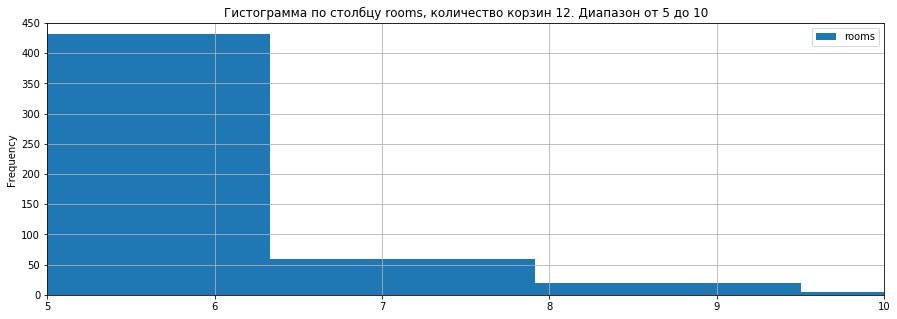

In [13]:
# Изменим границы и количество корзин.
data.plot(y='rooms', 
          kind='hist', 
          grid=True, 
          bins=12, 
          xlim=(5,10), 
          ylim=(0,450), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу rooms, количество корзин 12.'
          ' Диапазон от 5 до 10')
plt.show()

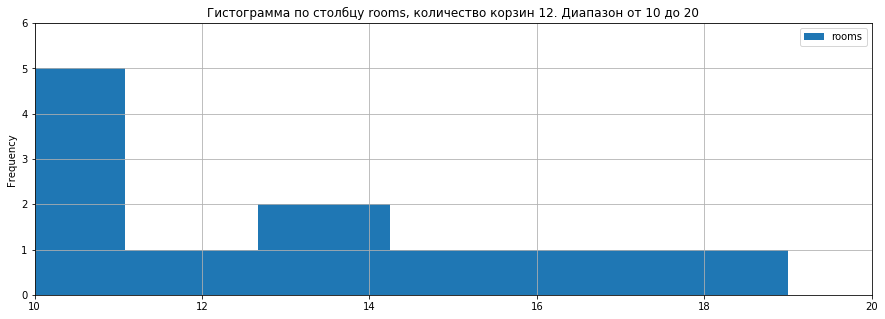

In [14]:
# Изменим границы и количество корзин.
data.plot(y='rooms', 
          kind='hist', 
          grid=True, 
          bins=12, 
          xlim=(10,20), 
          ylim=(0,6), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу rooms, количество корзин 12.'
          ' Диапазон от 10 до 20')
plt.show()

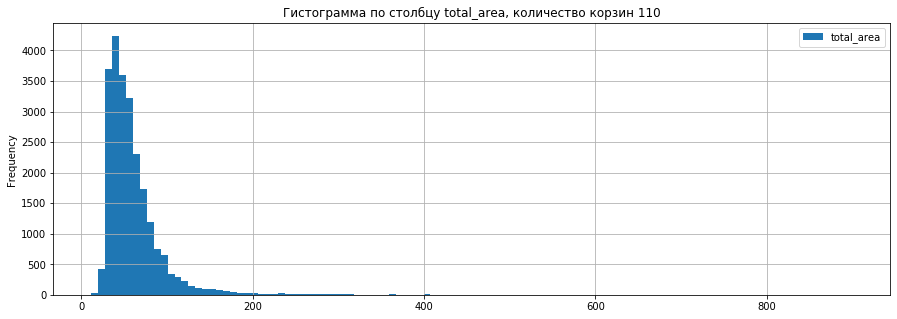

In [15]:
# Теперь площадь.
data.plot(y='total_area', 
          kind='hist', 
          grid=True, 
          bins=110, 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу total_area, количество корзин 110')
plt.show()

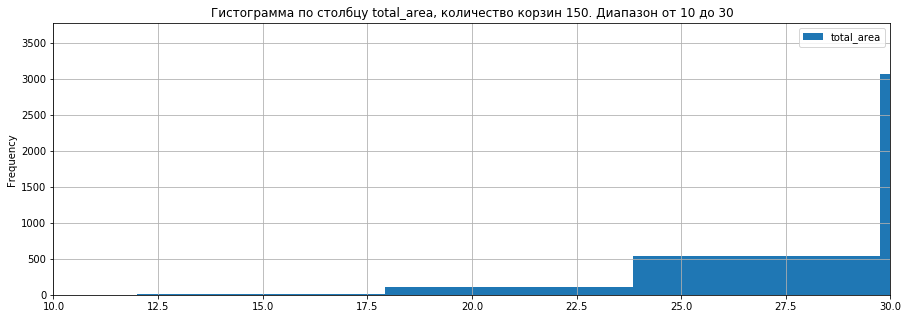

In [16]:
# Изменим границы и количество корзин.
data.plot(y='total_area', 
          kind='hist', 
          grid=True, 
          bins=150, 
          xlim=(10,30), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу total_area, количество корзин 150.' 
          ' Диапазон от 10 до 30')
plt.show()

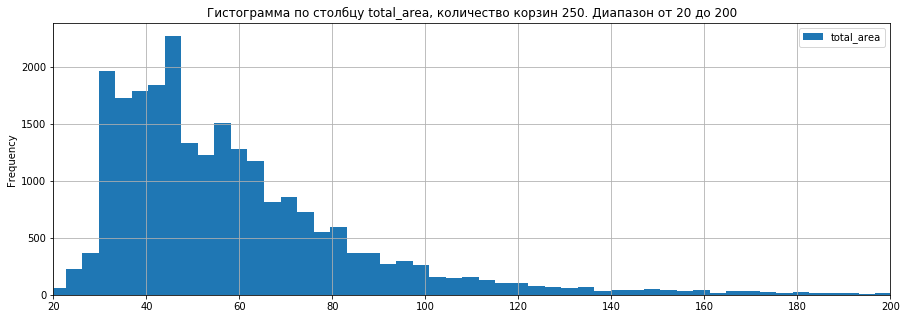

In [17]:
# Изменим границы и количество корзин.
data.plot(y='total_area', 
          kind='hist', 
          grid=True, 
          bins=250, 
          xlim=(20,200), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу total_area, количество корзин 250.'
          ' Диапазон от 20 до 200')
plt.show()

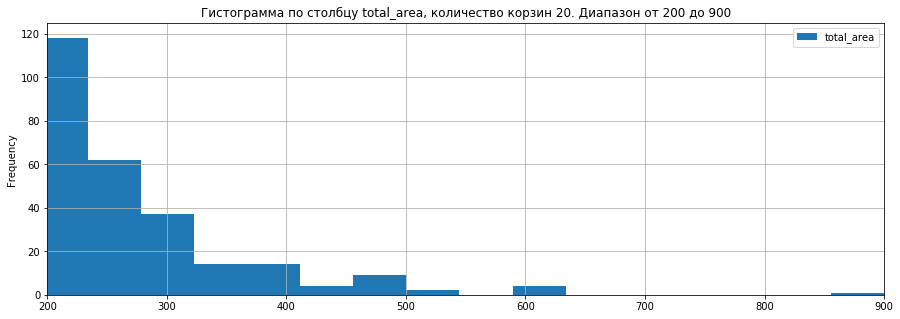

In [18]:
# Изменим границы и количество корзин.
data.plot(y='total_area', 
          kind='hist', 
          grid=True, 
          bins=20, 
          xlim=(200,900), 
          ylim=(0,125), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу total_area, количество корзин 20.'
          ' Диапазон от 200 до 900')
plt.show()

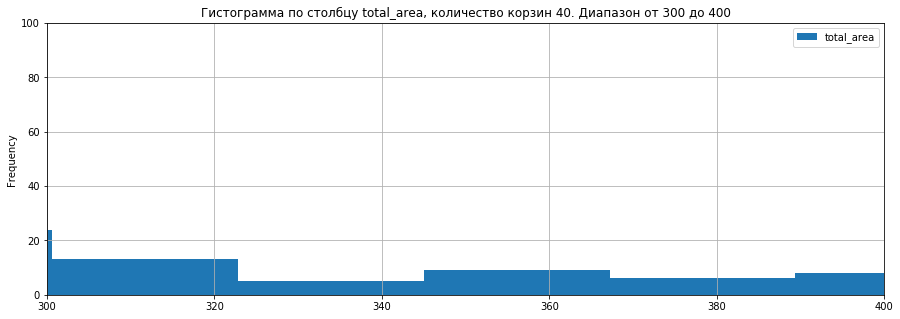

In [19]:
# Изменим границы и количество корзин.
data.plot(y='total_area', 
          kind='hist', 
          grid=True, 
          bins=40, 
          figsize=(15,5), 
          xlim=(300,400), 
          ylim=(0,100)
         )
plt.title('Гистограмма по столбцу total_area, количество корзин 40.'
          ' Диапазон от 300 до 400')
plt.show()

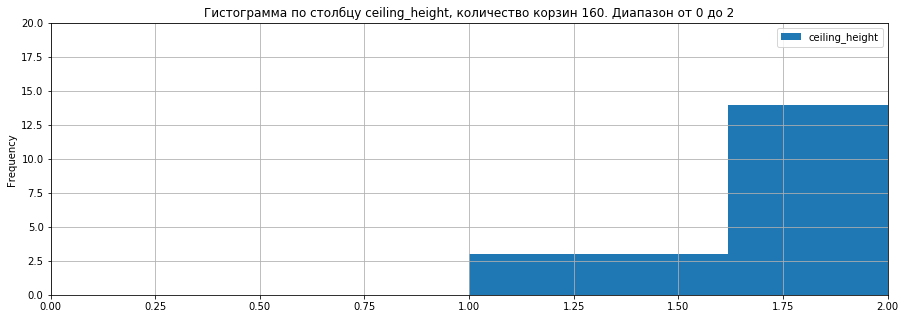

In [20]:
# И наконец высота потолков.
data.plot(y='ceiling_height', 
          kind='hist', 
          grid=True, 
          bins=160, 
          xlim=(0,2), 
          ylim=(0,20), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 160.'
          ' Диапазон от 0 до 2')
plt.show()

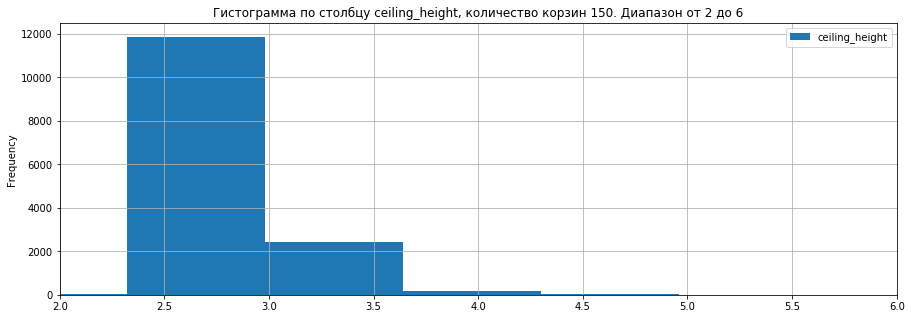

In [21]:
# Изменим границы и количество корзин.
data.plot(y='ceiling_height', 
          kind='hist', 
          grid=True, 
          bins=150, 
          xlim=(2,6), 
          ylim=(0,12500), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 150.'
          ' Диапазон от 2 до 6')
plt.show()

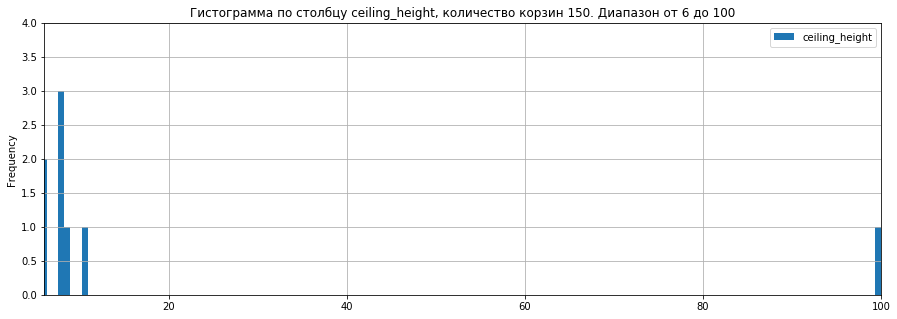

In [22]:
# Изменим границы и количество корзин.
data.plot(y='ceiling_height', 
          kind='hist', 
          grid=True, 
          bins=150, 
          xlim=(6,100), 
          ylim=(0,4), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 150.'
          ' Диапазон от 6 до 100')
plt.show()

<strong>Результаты изучения цены, количества комнат, площади и высоты потолков</strong>
    <p><u>Цена</u></p>
В <strong>среднем</strong> квартира стоит <strong>6 541 127 руб</strong>. <strong>Медианное</strong> значение составило <strong>4 650 000 руб.</strong> <strong>Минимальная</strong> цена составила <strong>12 190 руб.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>763 000 000 руб.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить нормальность распределения данных со смещением влево. Цена в 12 190 руб. безусловно является подозрительной. Данное объявление и похожие по цене объявления претендуют на исключение из анализа. По мнению автора проекта квартиры стоимостью больше 50 000 000 руб. и даже квартиру с максимальной ценой 763 000 000 руб. на данном этапе необходимо оставить в данных, так как такие цены реальны и отражают действительность рынка жилой недвижимости(https://www.fontanka.ru/2020/10/11/69500383/). Возможно на следующих этапах исследования будет необходимо исключить из выборки квартиры дороже 50 000 000 руб., так как такие данные редки, а также стоимость квартир из такой ценовой категории формируется скорее не исходя из ситуации на рынке жилья, а из субъективных пожеланий и оценки продавцов. Не исключено, что для элитного жилья существует свой отдельный рынок со своими законами ценообразования.
   <p><u>Количество комнат</u></p>
В <strong>среднем</strong> в квартирах <strong>2,07 комнаты</strong>. <strong>Медианное</strong> значение составило <strong>2 комнаты.</strong> <strong>Минимальное</strong> количество комнат <strong>0 комнат.</strong> <br><strong>Максимальное</strong> 	&#8212; <strong>19 комнат.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить нормальность распределения со смещением влево, а также предположить, что выбросы и аномалии отсутствуют. Количество комнат равное 0 означает или студию или открытую планировку. На рынке недвижимости могут встретиться события, которые изначально покажутся невероятными. Например, в Москве есть 20-комнатная квартира. На следующих этапах возможно установление верхней границы выборки в количестве 14 комнат (https://www.mirkvartir.ru/journal/analytics/2016/08/22/samaa-mnogokomnatnaa-kvartira-v-rossii-sostoit-iz-20-pomesenii/).
   <p><u>Площадь</u></p>
В <strong>среднем</strong> площадь квартиры составила <strong>60,329 м<sup>2</sup></strong>. <strong>Медианное</strong> значение составило <strong>52 м<sup>2</sup>.</strong> <strong>Минимальная</strong> площадь <strong>12 м<sup>2</sup>.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>900 м<sup>2</sup>.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно предположить, что распределение данных является нормальным со смещением влево, а выбросы и аномалии отсутствуют. Площадь квартиры 12 м<sup>2</sup> вполне реальна, а площадь 900 м<sup>2</sup> теоретически может быть реальной. Тем не менее на следующих этапах стоит рассмотреть исключение из выборки квартир с площадью более <br>540 м<sup>2</sup> (https://lenta.ru/news/2019/08/15/spb/).
    <p><u>Высота потолков</u></p>
В <strong>среднем</strong> высота потолков в квартирах составляет <strong>2,735 м</strong>. <strong>Медианное</strong> значение составило <strong>2,65 м.</strong> <strong>Минимальная</strong> высота потолков составила <strong>1 м.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>100 м.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить наличие второго пика (от 20 до 40 м), а значит зафиксировать ненормальность распределения данных. Скорее всего данный пик образовался из-за ошибки в фиксации разрядности числа при занесении данных. Автор проекта предполагает, что эти значения в 10 раз больше, чем на самом деле, и такие данные нужно скорректировать. Также стоит отметить, что для выборки данных необходимо установить границы высоты потолков от 2,2 м до 10 м. Это поможет исключить из исследования искаженные данные (как, например, квартира с высотой потолков 100 м или 1 м).

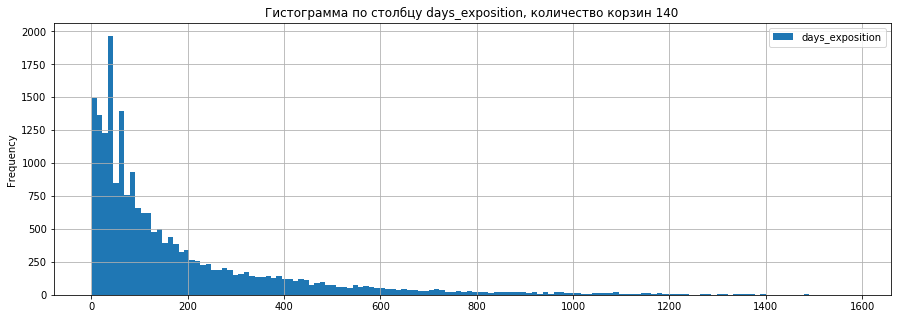

In [23]:
# Необходимо наиподробнейшим образом рассмотреть 
# гистограмму распределения значений времени продажи квартир. 
# Построим несколько гистограмм с нужным масштабом.
data.plot(y='days_exposition', 
          kind='hist', 
          grid=True, 
          bins=140, 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу days_exposition,'
          ' количество корзин 140')
plt.show()

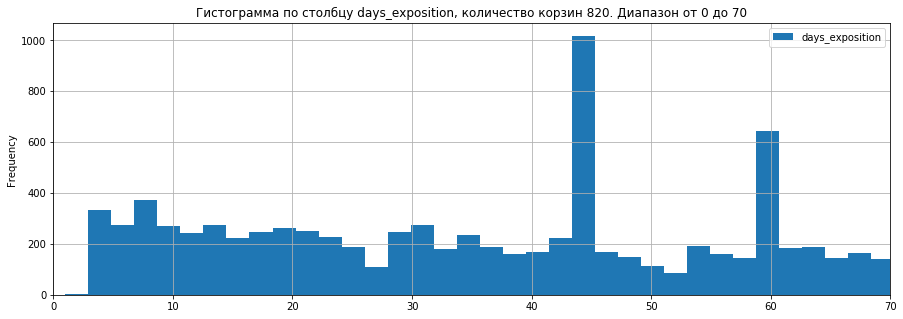

In [24]:
# Изменим границы и количество корзин.
data.plot(y='days_exposition', 
          kind='hist', 
          grid=True, 
          figsize=(15,5), 
          bins=820, 
          xlim=(0,70)
         )
plt.title('Гистограмма по столбцу days_exposition, количество корзин 820.' 
          ' Диапазон от 0 до 70')
plt.show()

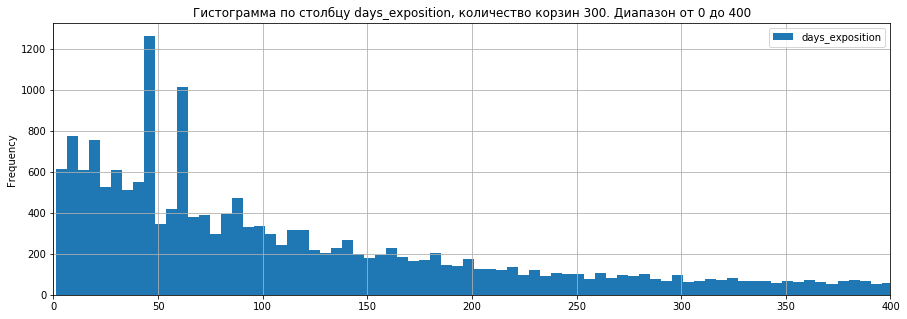

In [25]:
# Изменим границы и количество корзин.
data.plot(y='days_exposition', 
          kind='hist', 
          grid=True, 
          bins=300, 
          figsize=(15,5), 
          xlim=(0,400)
         )
plt.title('Гистограмма по столбцу days_exposition, количество корзин 300.' 
          ' Диапазон от 0 до 400')
plt.show()

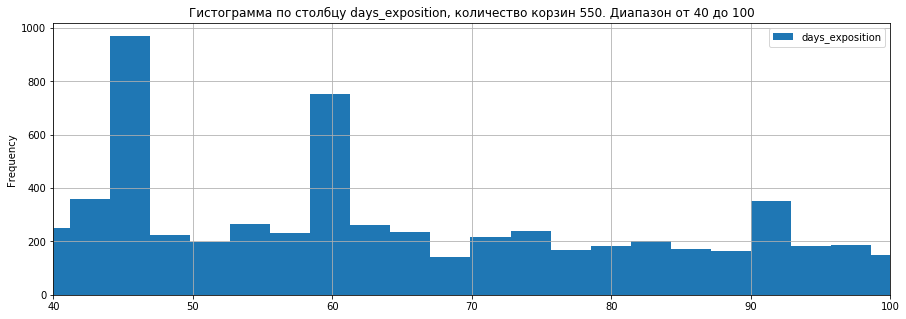

In [26]:
# Изменим границы и количество корзин.
data.plot(y='days_exposition', 
          kind='hist', 
          grid=True, 
          bins=550, 
          xlim=(40,100), 
          figsize=(15,5)
         )
plt.title('Гистограмма по столбцу days_exposition, количество корзин 550.' 
          ' Диапазон от 40 до 100')
plt.show()

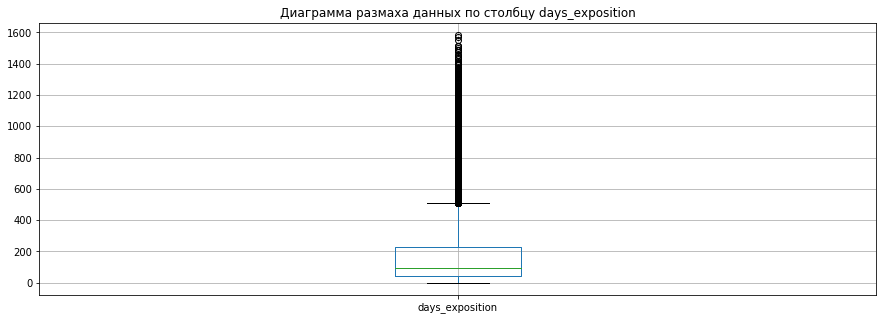

In [27]:
# Изменим границы и количество корзин.
data.plot(y='days_exposition', 
          kind='box', 
          grid=True, 
          figsize=(15,5)
         )
plt.title('Диаграмма размаха данных по столбцу days_exposition')
plt.show()

In [28]:
# Изучим основые статистические данные.
display(data['days_exposition'].describe())
# Было важно отсортировать таблицу value_counts 
# по индексу, то есть по времени продажи.
display(data['days_exposition'].value_counts().sort_index(
    ascending=True
)
       )

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

1.0         1
2.0         3
3.0       158
4.0       174
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64

<p><u><strong>Время продажи квартиры</strong></u></p>
В <strong>среднем</strong> время продажи квартиры составляет <strong>180,75 сут</strong>. <strong>Медианное</strong> значение составило <strong>95 сут.</strong> <strong>Минимальное</strong> время продажи квартиры составило <strong> 1 день.</strong> <br><strong>Максимальное</strong> 	&#8212; <strong>1580 суток.</strong> <br>Оценив диаграмму размаха и гистограммы, можно отметить наличие двух подозрительных пиков (45 дней, 60 дней), а значит зафиксировать ненормальность распределения данных. Гистограмма больше похожа на распределение Пуассона. Был проведен анализ данных в области этих пиков с целью определения закономерностей и причин их образования. Были сделаны срезы объявлений в границах 44,2-45,1 сут и 50,8-60,1 сут. Удельные характеристики данных срезов сравнивались с оставшимися частями набора данных. Сами срезы анализировались на содержание необычных закономерностей (например, вдруг большинство объявлений закрытых через 45 и 60 сут были о продаже квартир в каком-то одном населенном пункте? Или вдруг эти квартиры имеют схожие характеристики?). В ходе анализа не было выявлено закономерностей, по которым произошло увеличение частоты закрытия объявлений в данные периоды. <br>Несмотря на тот факт, что данные пики (45 и 60 сут) делают распределение ненормальным, у автора проекта нет оснований обрабатывать их, отбрасывать их, исключать из анализа, так как нет оснований считать их аномалиями, а так же подобное поведение покупателей вполне реально и может быть обусловлено неизвестными факторами. Также есть возможность того, что из-за наличия NaN-значений эти столбцы гистограммы оформились как пики, хотя на самом деле являются шумами.<br>На данный момент обычно продажи осуществляются за 95 суток. Очень быстрой считается продажа за 1 день. Это возможно. Несмотря на то, что сделка маловероятно может оформиться за 1 день, снять объявление с сервиса продавец вполне может, если потенциальный покупатель передаст ему залог. Необычно долгой продажей нельзя назвать ни одну из представленных продаж. Практически любой срок продажи квартиры реален. Максимальным значением является 1580 суток, и такое значение (примерно 4 года) вполне реально.

In [29]:
# Избавимся от редких значений и однозначных выбросов.
# Для начала срежем все данные с ценой выше 50 000 000 руб. 
# Исключим строку с ценой квартиры 12 190 руб.
# Срежем квартиры с площадью более 320 кв. м.,
# квартиры с более, чем 8 комнатами,
# квартиры в домах, у которых более 37 этажей.
data_good_floors = data.loc[
    (data['last_price'] <= 50_000_000) &
    (data['last_price'] != 12190) &
    (data['total_area'] < 320) &
    (data['rooms'] <= 8) &
    (data['floors_total'] <= 37)
]

In [30]:
# Срежем квартиры c маловероятной высотой потолков. 
data_final = data_good_floors.query(
    '(ceiling_height >= 2) and (ceiling_height != 100)'
    'or (ceiling_height != ceiling_height)'
)
display(data_final)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,weekday,month,year,flat_floor,floor_categories,cityCenters_nearest_km,price_per_km,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,2,16.0,812500.0,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0,19.0,176316.0,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,2,14.0,371143.0,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,2,8.0,1250000.0,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,2,NaN,NaN,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другой,2,4.0,2425000.0,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542,0,1,2018,другой,2,NaN,NaN,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091,6,2,2018,первый,0,NaN,NaN,0.523810,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другой,2,10.0,1147500.0,NaN,0.303583


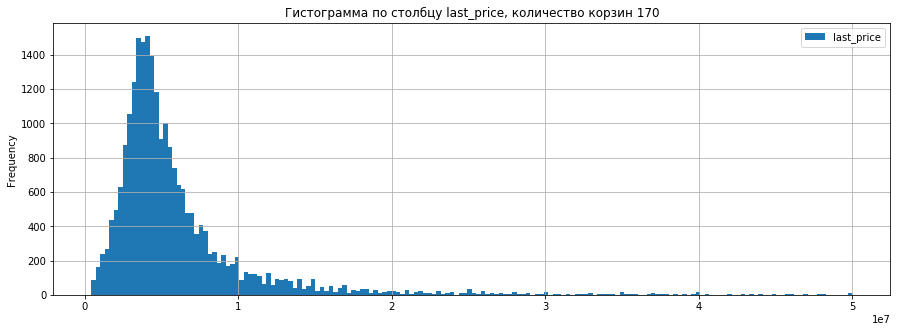

In [31]:
# Изучим получившуюся выборку данных
data_final.plot(
    y='last_price', 
    kind='hist', 
    grid=True, 
    bins=170, 
    figsize=(15,5)
)
plt.title('Гистограмма по столбцу last_price, количество корзин 170')
plt.show()

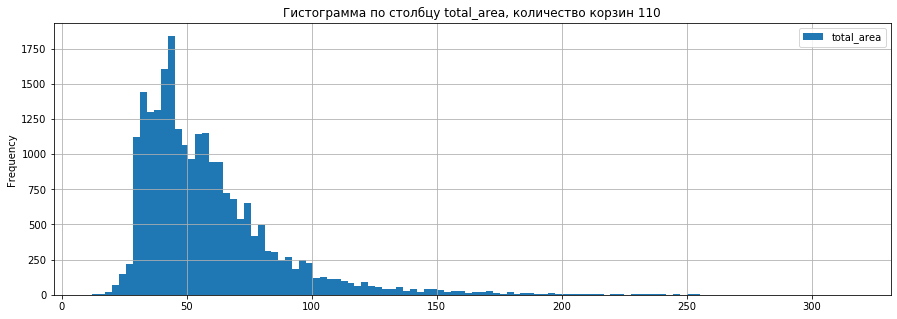

In [32]:
data_final.plot(
    y='total_area', 
    kind='hist', 
    grid=True, 
    bins=110, 
    figsize=(15,5)
)
plt.title('Гистограмма по столбцу total_area, количество корзин 110')
plt.show()

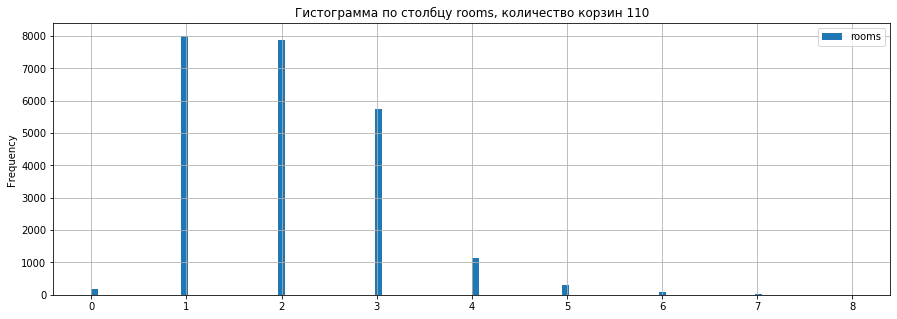

In [33]:
data_final.plot(
    y='rooms', 
    kind='hist', 
    grid=True, 
    bins=110, 
    figsize=(15,5)
)
plt.title('Гистограмма по столбцу rooms, количество корзин 110')
plt.show()

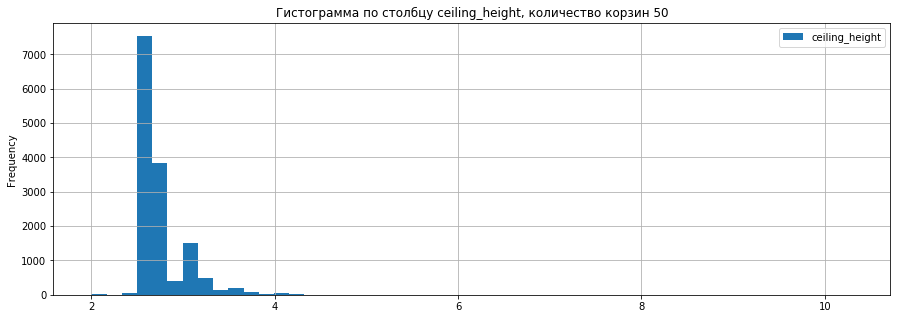

In [34]:
data_final.plot(
    y='ceiling_height', 
    kind='hist', 
    grid=True, 
    bins=50, 
    figsize=(15,5)
)
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 50')
plt.show()

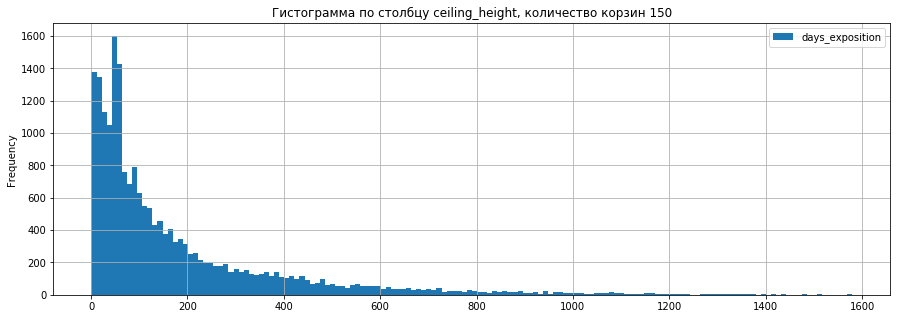

In [35]:
data_final.plot(
    y='days_exposition', 
    kind='hist', 
    grid=True, 
    bins=150, 
    figsize=(15,5)
)
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 150')
plt.show()

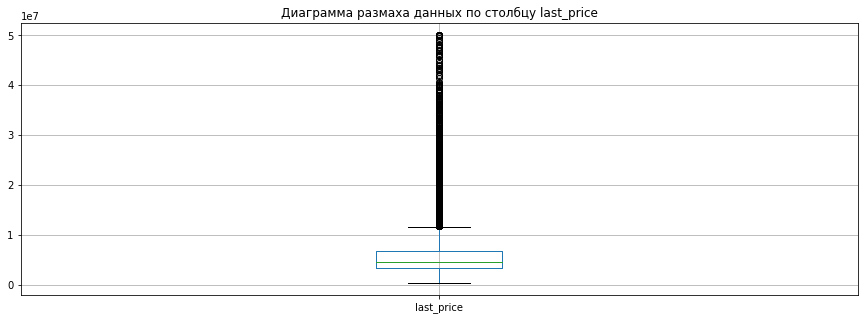

count    2.339100e+04
mean     5.958070e+06
std      4.870064e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

4500000     341
3500000     289
4300000     260
4000000     260
4200000     258
           ... 
5026719       1
3886000       1
22932404      1
4288000       1
12288000      1
Name: last_price, Length: 2810, dtype: int64

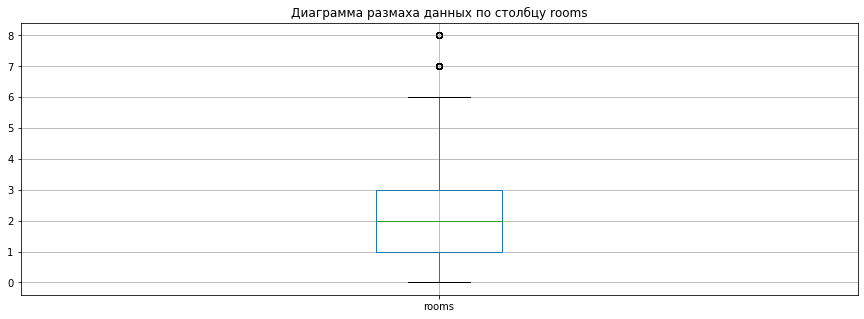

count    23391.000000
mean         2.047283
std          1.019513
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

1    8000
2    7887
3    5746
4    1138
5     294
0     193
6      85
7      40
8       8
Name: rooms, dtype: int64

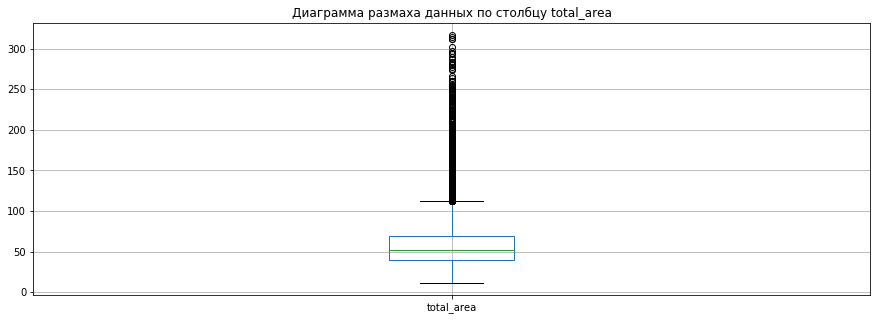

count    23391.000000
mean        58.781417
std         28.856020
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        316.300000
Name: total_area, dtype: float64

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
36.85       1
102.25      1
226.00      1
280.00      1
78.96       1
Name: total_area, Length: 2064, dtype: int64

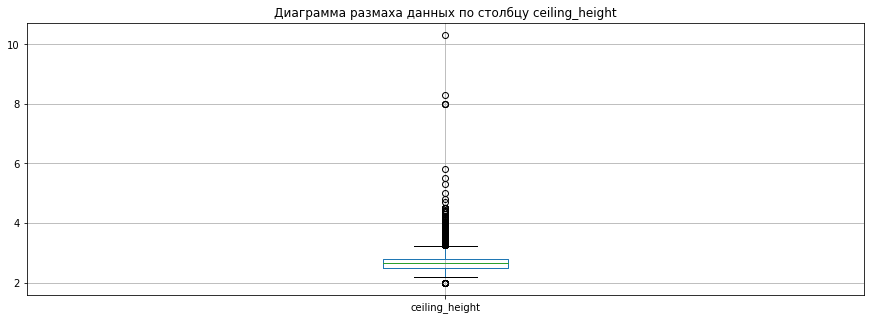

count    14362.000000
mean         2.722782
std          0.288865
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

2.50    3521
2.60    1646
2.70    1578
3.00    1088
2.80     987
        ... 
8.30       1
4.37       1
3.68       1
3.86       1
2.49       1
Name: ceiling_height, Length: 163, dtype: int64

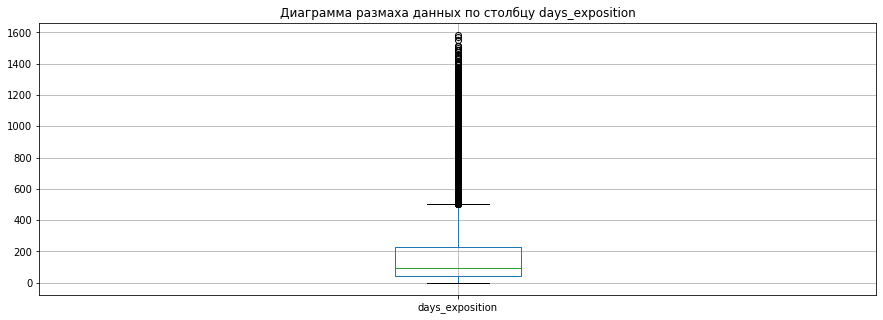

count    20258.000000
mean       179.897028
std        219.006659
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

45.0      877
60.0      538
7.0       234
30.0      208
90.0      195
         ... 
1183.0      1
1355.0      1
844.0       1
1140.0      1
773.0       1
Name: days_exposition, Length: 1136, dtype: int64

In [36]:
parameters = ['last_price', 'rooms', 'total_area', 'ceiling_height', 'days_exposition']    
for element in parameters:
    description(data_final, element)

<p><u><strong>Созданы срезы данных. Убраны редкие и выбивающиеся значения</strong></u></p>
<br /><li>Избавились от квартир дороже 50 000 000 руб.</li>
<br /><li>Избавились от квартир с площадью более 320 м<sup>2</sup> и с количеством комнат более 8.</li>
<br /><li>Избавились от домов с количеством этажей более 37 (именно столько этажей в самом высоком жилом здании Петербурга).</li>
<br /><li>Избавились от квартир с маловероятной высотой потолков.</li>

После создания срезов гистограммы стали не такими размашистыми, как изначально. Их форма стала более похожа на нормальную, при этом уклоны сохранены. У гистограммы по столбцу **days_exposition** по-прежнему остались 2 пика.

,last_price,total_area,rooms,floor_categories,cityCenters_nearest
last_price,1.000000,0.782844,0.492378,0.128397,-0.292011
total_area,0.782844,1.000000,0.764652,0.100012,-0.183782
rooms,0.492378,0.764652,1.000000,0.025107,-0.163681
floor_categories,0.128397,0.100012,0.025107,1.000000,-0.048787
cityCenters_nearest,-0.292011,-0.183782,-0.163681,-0.048787,1.000000


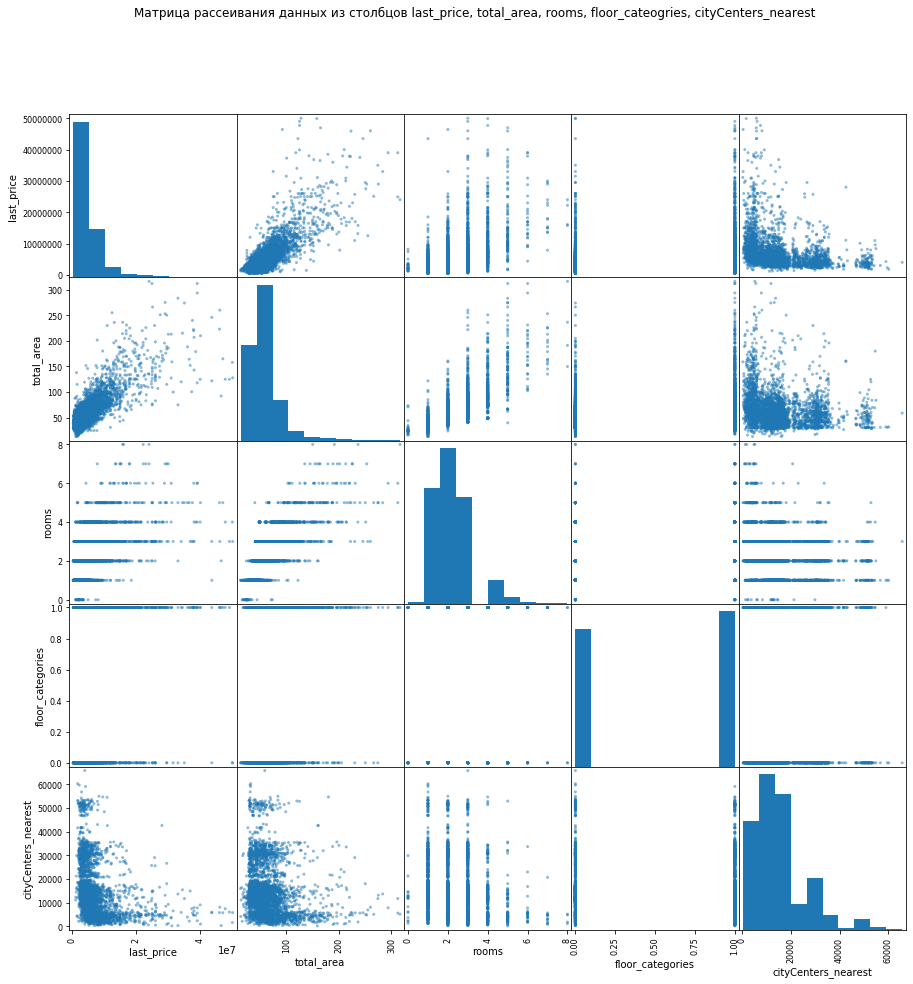

In [37]:
# Определим зависимость цены квартиры от площади, количества 
# комнат, этажа (первого или последнего) и расстояния до центра города.
# Создадим срез столбцов для анализа.
data_corr1 = data_final[['last_price',
                         'total_area', 
                         'rooms', 
                         'floor_categories', 
                         'cityCenters_nearest']]
# Исключим квартиры, расположенные на "других" этажах.
data_corr1_final = data_corr1.query('floor_categories != 2')
# Построим матрицу рассеивания, а также 
# посчитаем коэффициенты корреляции Пирсона.
pd.plotting.scatter_matrix(data_corr1_final, figsize=(15,15))
plt.suptitle('Матрица рассеивания данных из столбцов last_price,' 
             ' total_area, rooms, floor_cateogries, cityCenters_nearest')
display(data_corr1_final.corr())

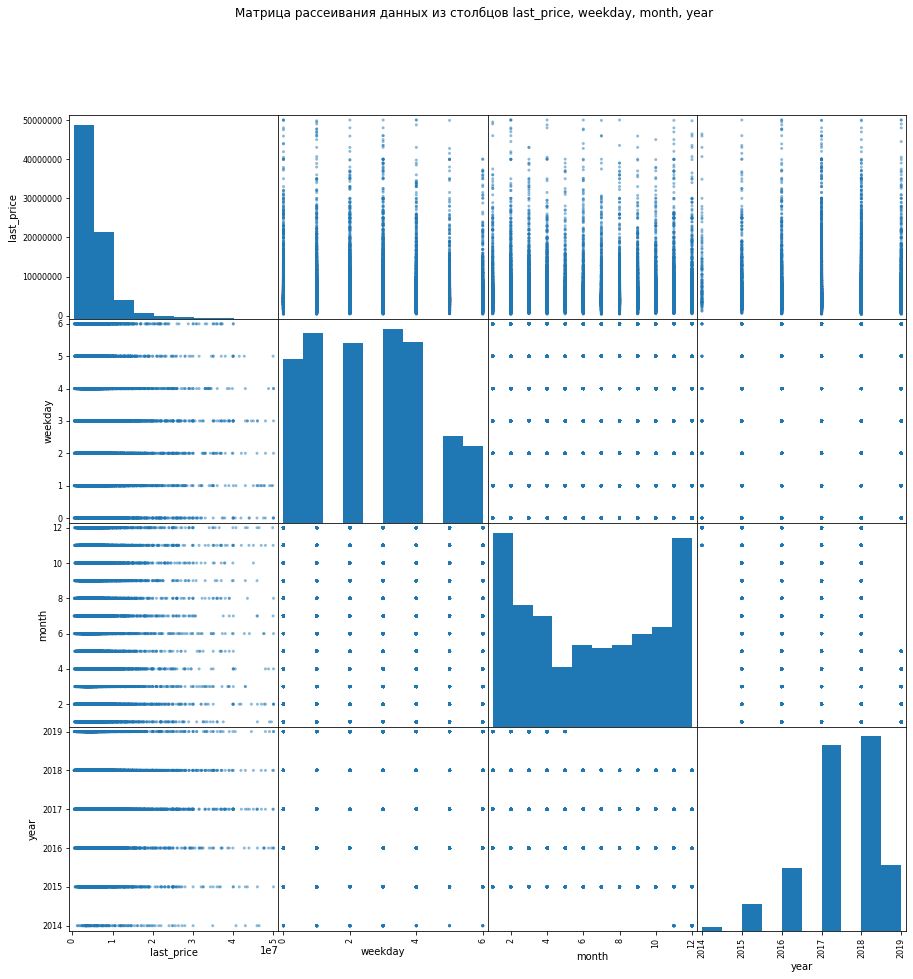

,last_price,weekday,month,year
last_price,1.000000,-0.017111,0.004410,-0.045723
weekday,-0.017111,1.000000,0.012867,-0.002930
month,0.004410,0.012867,1.000000,-0.271863
year,-0.045723,-0.002930,-0.271863,1.000000


In [38]:
# Изучим влияние дня недели, месяца и года размещения объявления на цену.
data_corr2 = data_final[['last_price','weekday','month','year']]
pd.plotting.scatter_matrix(data_corr2, figsize=(15,15))
plt.suptitle('Матрица рассеивания данных из столбцов ' +
             'last_price, weekday, month, year')
plt.show()
display(data_corr2.corr())

<p><u><strong>Анализ влияния факторов на цену квартиры</strong></u></p>
<br/> Анализ матрицы рассеивания, а также коэффициентов корреляции Пирсона показал:
<br/><li>Существует довольно сильная прямая зависимость цены квартиры от её площади.</li>
<br/><li>Существует прямая связь между ценой квартиры и количеством комнат. Однако она не слишком сильная.</li>
<br/><li>Существует крайне незначительная прямая связь между ценой квартиры и её этажем.</li>
<br/><li>Существует обратная связь между ценой квартиры и её расстоянием до центра. Однако она незначительна.</li>
<br/><li>Связь между ценой квартиры и датой размещения объявления (будь то днем, месяцем или годом) практически отсутствует.</li>

<p><u><strong>Вывод:</strong></u></p> Определяющим фактором в формировании цены квартиры в большей степени является её площадь. Также на ценообразование может повлиять количество комнат и расстояние до центра города. В незначительной степени на цену квартиры может повлиять этаж, на котором она расположена. 

In [39]:
# Рассчитаем среднюю цену квадратного метра жилья.
mean_price = data_final.pivot_table(index='locality_name',
                                    values='sqr_meter_price',
                                    aggfunc=['mean','count'])
# Переименуем "двухэтажные" имена столбцов
mean_price.columns = ['mean_sqr_meter_price', 'number']
# Обрежем получившуюся таблицу по строкам. 
# Оставим 10 самых часто встречающихся населенных пунктов.
mean_price = mean_price.sort_values(
    by='number', ascending=False).reset_index().truncate(after=9)
# Для удобства вывода результата передадим 
# индексам строк имена стольбца locality_name.
mean_price = mean_price.set_index('locality_name')
display(mean_price)
print('Среди 10 наиболее упоминаемых городов самая высокая средняя ' + 
      'стоимость жилья в городе ' + 
      '{}. \nОна составляет {:.0f} рублей/кв.м.'.format(
          mean_price['mean_sqr_meter_price'].idxmax(), 
          mean_price['mean_sqr_meter_price'].max()
      )
     )
print('Среди 10 наиболее упоминаемых городов самая низкая средняя '+
      'стоимость жилья в городе ' +
      '{}. \nОна составляет {:.0f} рублей/кв.м.'.format(
          mean_price['mean_sqr_meter_price'].idxmin(), 
          mean_price['mean_sqr_meter_price'].min()
      )
     )

,mean_sqr_meter_price,number
locality_name,,
Санкт-Петербург,112264.468256,15483
посёлок Мурино,85672.803846,520
посёлок Шушары,78550.883827,439
Всеволожск,68654.007538,398
Пушкин,103130.405995,367
Колпино,75332.866469,337
посёлок Парголово,90175.489297,327
Гатчина,68745.693811,307
деревня Кудрово,92473.086957,299


Среди 10 наиболее упоминаемых городов самая высокая средняя стоимость жилья в городе Санкт-Петербург. 
Она составляет 112264 рублей/кв.м.
Среди 10 наиболее упоминаемых городов самая низкая средняя стоимость жилья в городе Выборг. 
Она составляет 58141 рублей/кв.м.


<p><u><strong>Составление рейтинга населенных пунктов по частоте упоминания</strong></u></p>
Создан рейтинг 10 самых упоминаемых населенных пунктов выборки. Наиболее часто упоминаются объявления о продаже квартир в Санкт-Петербурге. Реже всего &ndash; в Выборге. Эти же населенные пункты занимают первое и десятое место по средней цене за квадратный метр жилья: 112264 руб./м<sup>2</sup> и 58141 руб./м<sup>2</sup> соответственно. 

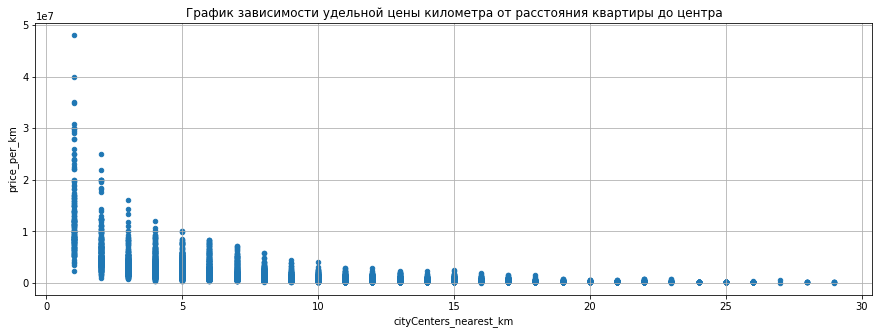

In [40]:
# Оставим только объявления в Санкт-Петербурге.
spb_data = data_final.query('locality_name == "Санкт-Петербург"')
# Определим границу условного центра. Построим график зависимости
# удельной цены километра от расстояния квартиры до центра.
spb_data.sort_values(
    'cityCenters_nearest_km').plot(
    x='cityCenters_nearest_km', 
    y='price_per_km',
    kind='scatter', 
    grid=True, 
    figsize=(15,5)
)
plt.title('График зависимости удельной цены километра' +
          ' от расстояния квартиры до центра')
plt.show()

<p><u><strong>Вывод:</strong></u></p>
По графику можно заметить, как растет удельная цена, начиная с расстояния 10 км. Но существенный, резкий рост она начинает показывать с 4 км. Это и будет границей центра. Воспользовавшись, например, инструментом Яндекс.Карт "линейка" можно убедиться в корректности выбора данной границы.

Средняя цена квадратного метра жилья в центре Санкт-Петербурга составляет 133293 руб/кв. м


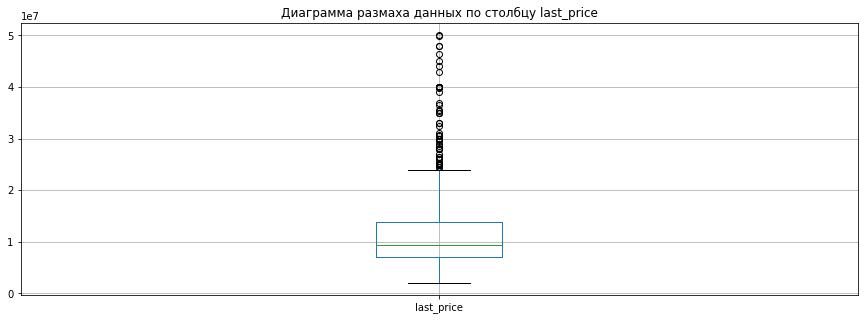

count    8.310000e+02
mean     1.176332e+07
std      7.515985e+06
min      2.100000e+06
25%      7.125000e+06
50%      9.400000e+06
75%      1.392500e+07
max      5.000000e+07
Name: last_price, dtype: float64

8000000     18
9000000     16
12000000    13
9500000     12
14000000    11
            ..
14050000     1
18900000     1
5260000      1
7850000      1
16700000     1
Name: last_price, Length: 357, dtype: int64

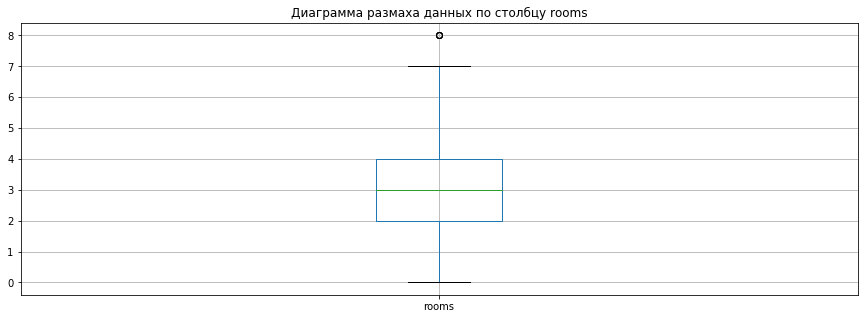

count    831.000000
mean       3.008424
std        1.342961
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: rooms, dtype: float64

3    261
2    253
4    138
1     70
5     62
6     26
7     13
8      4
0      4
Name: rooms, dtype: int64

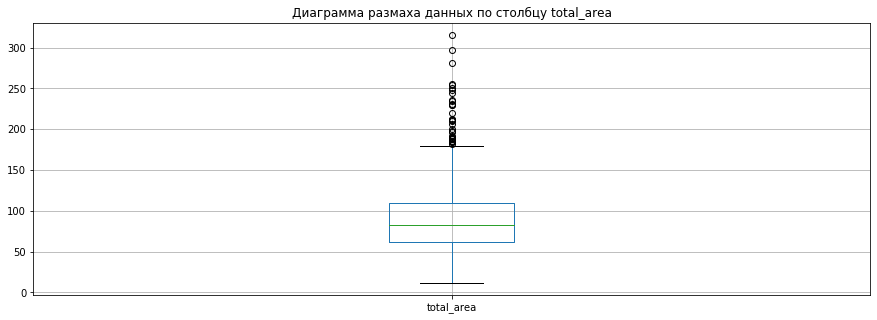

count    831.000000
mean      91.017714
std       42.702510
min       12.000000
25%       62.100000
50%       82.100000
75%      110.000000
max      315.000000
Name: total_area, dtype: float64

50.0     17
70.0     12
60.0     12
80.0     10
96.0     10
         ..
87.5      1
72.5      1
45.6      1
251.0     1
120.6     1
Name: total_area, Length: 447, dtype: int64

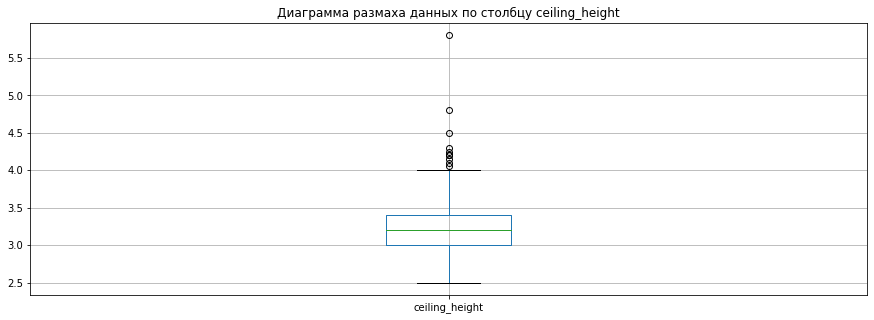

count    580.000000
mean       3.202586
std        0.374574
min        2.500000
25%        3.000000
50%        3.200000
75%        3.400000
max        5.800000
Name: ceiling_height, dtype: float64

3.00    80
3.20    53
3.50    45
3.10    31
3.30    30
        ..
3.44     1
3.09     1
4.80     1
5.80     1
3.03     1
Name: ceiling_height, Length: 98, dtype: int64

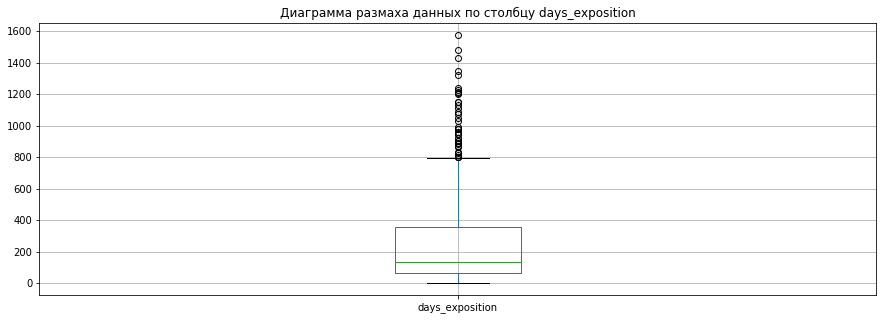

count     681.000000
mean      249.035242
std       276.321640
min         3.000000
25%        61.000000
50%       134.000000
75%       353.000000
max      1572.000000
Name: days_exposition, dtype: float64

90.0     26
60.0     16
30.0     11
9.0       6
5.0       6
         ..
152.0     1
361.0     1
164.0     1
220.0     1
495.0     1
Name: days_exposition, Length: 376, dtype: int64

In [41]:
# Оставим только квартиры, находящиеся в условном центре
spb_data_center = spb_data.query('cityCenters_nearest_km < 4')
print('Средняя цена квадратного метра жилья в центре Санкт-Петербурга составляет ' +
      '{:.0f} руб/кв. м'.format(spb_data_center['sqr_meter_price'].mean().round()))
# Вновь воспользуемся функцией description с целью статистического описания параметров
for element in parameters:
    description(spb_data_center, element)

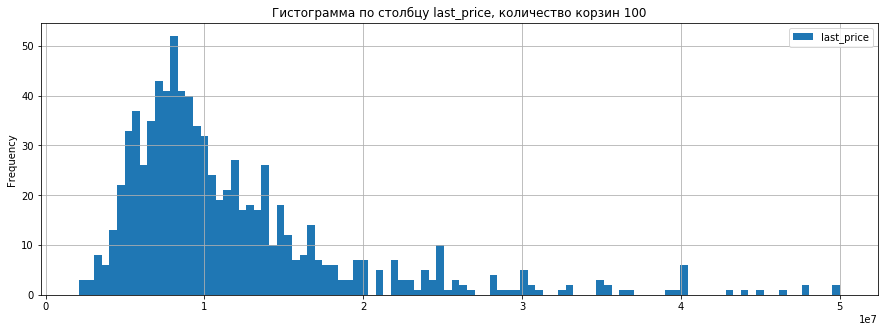

In [42]:
# Теперь построим гистограммы для каждого параметра. 
# Выбором числа корзин занимаемся вручную.
# Начнем с цены.
spb_data_center.plot(y='last_price', 
                     kind='hist', 
                     grid=True, 
                     bins=100, 
                     figsize=(15,5)
                    )
plt.title('Гистограмма по столбцу last_price, количество корзин 100')
plt.show()

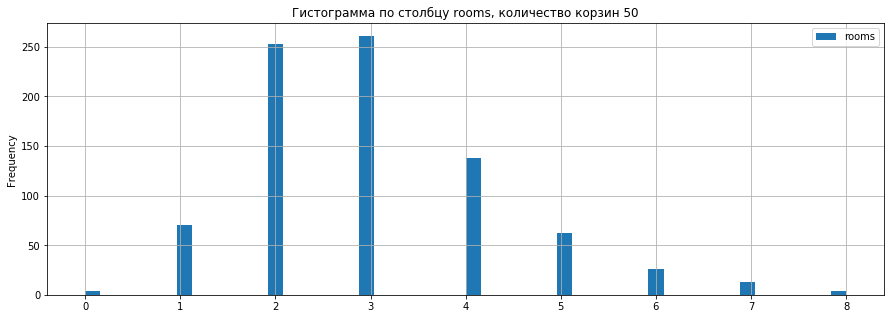

In [43]:
# Теперь количество комнат.
spb_data_center.plot(y='rooms', 
                     kind='hist', 
                     grid=True, 
                     bins=50, 
                     figsize=(15,5)
                    )
plt.title('Гистограмма по столбцу rooms, количество корзин 50')
plt.show()

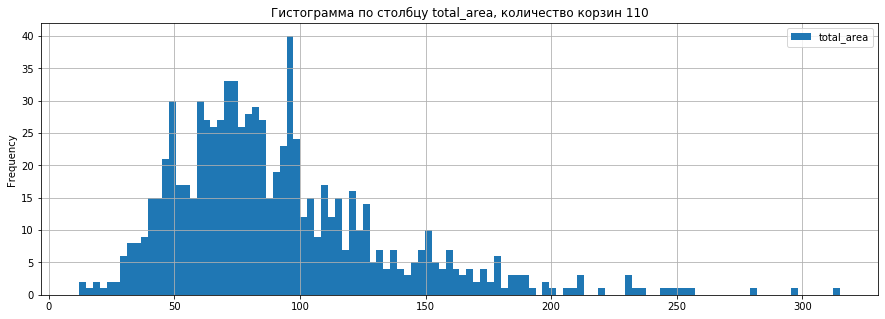

In [44]:
# Теперь площадь.
spb_data_center.plot(y='total_area', 
                     kind='hist', 
                     grid=True, 
                     bins=110, 
                     figsize=(15,5))
plt.title('Гистограмма по столбцу total_area, количество корзин 110')
plt.show()

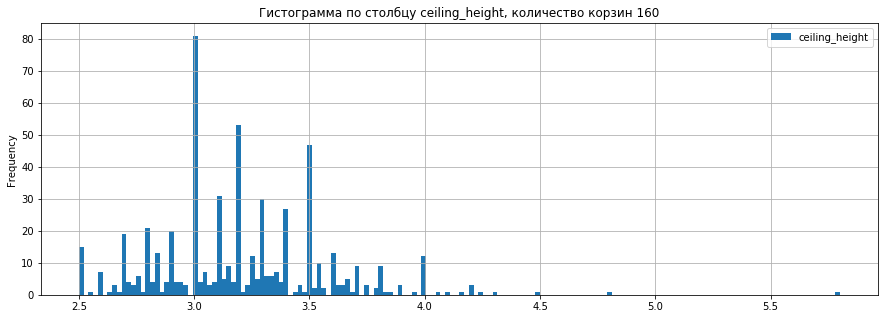

In [45]:
# И наконец высота потолков.
spb_data_center.plot(y='ceiling_height', 
                     kind='hist', 
                     grid=True, 
                     bins=160, 
                     figsize=(15,5))
plt.title('Гистограмма по столбцу ceiling_height, количество корзин 160')
plt.show()

<strong>Результаты изучения цены, количества комнат, площади и высоты потолков в квартирах центральной части Санкт-Петербурга</strong>
    <p><u>Цена</u></p>
В <strong>среднем</strong> квартира стоит <strong>11 763 320 руб</strong>. <strong>Медианное</strong> значение составило <strong>9 400 000 руб.</strong> <strong>Минимальная</strong> цена составила <strong>2 100 000 руб.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>50 000 000 руб.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить нормальность распределения данных со смещением влево.
   <p><u>Количество комнат</u></p>
В <strong>среднем</strong> в квартирах <strong>3 комнаты</strong>. <strong>Медианное</strong> значение составило <strong>3 комнаты.</strong> <strong>Минимальное</strong> количество комнат <strong>0 комнат.</strong> <br><strong>Максимальное</strong> 	&#8212; <strong>8 комнат.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить нормальность распределения со смещением влево.
   <p><u>Площадь</u></p>
В <strong>среднем</strong> площадь квартиры составила <strong>91 м<sup>2</sup></strong>. <strong>Медианное</strong> значение составило <strong>82 м<sup>2</sup>.</strong> <strong>Минимальная</strong> площадь <strong>12 м<sup>2</sup>.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>315 м<sup>2</sup>.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно предположить, что распределение данных является нормальным со смещением влево. При этом присутствует второй пик в районе 90-100 м<sup>2</sup>.
    <p><u>Высота потолков</u></p>
В <strong>среднем</strong> высота потолков в квартирах составляет <strong>3,2 м</strong>. <strong>Медианное</strong> значение составило <strong>3,2 м.</strong> <strong>Минимальная</strong> высота потолков составила <strong>2,5 м.</strong> <br><strong>Максимальная</strong> 	&#8212; <strong>5,8 м.</strong> Оценив диаграмму размаха, а также гистограммы данного параметра, можно отметить нормальность распределения данных со смещением пика влево.

,last_price,total_area,rooms,floor_categories,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.614633,0.386635,0.163375,-0.189204,-0.046261,-0.000406,-0.002325
total_area,0.614633,1.000000,0.805760,0.161788,-0.062278,-0.006133,-0.033562,-0.075143
rooms,0.386635,0.805760,1.000000,0.098905,-0.048568,0.000436,-0.055521,-0.073605
floor_categories,0.163375,0.161788,0.098905,1.000000,0.004794,0.014790,0.026771,-0.010015
cityCenters_nearest,-0.189204,-0.062278,-0.048568,0.004794,1.000000,-0.006517,-0.026687,0.094421
weekday,-0.046261,-0.006133,0.000436,0.014790,-0.006517,1.000000,-0.016241,-0.021800
month,-0.000406,-0.033562,-0.055521,0.026771,-0.026687,-0.016241,1.000000,-0.236133
year,-0.002325,-0.075143,-0.073605,-0.010015,0.094421,-0.021800,-0.236133,1.000000


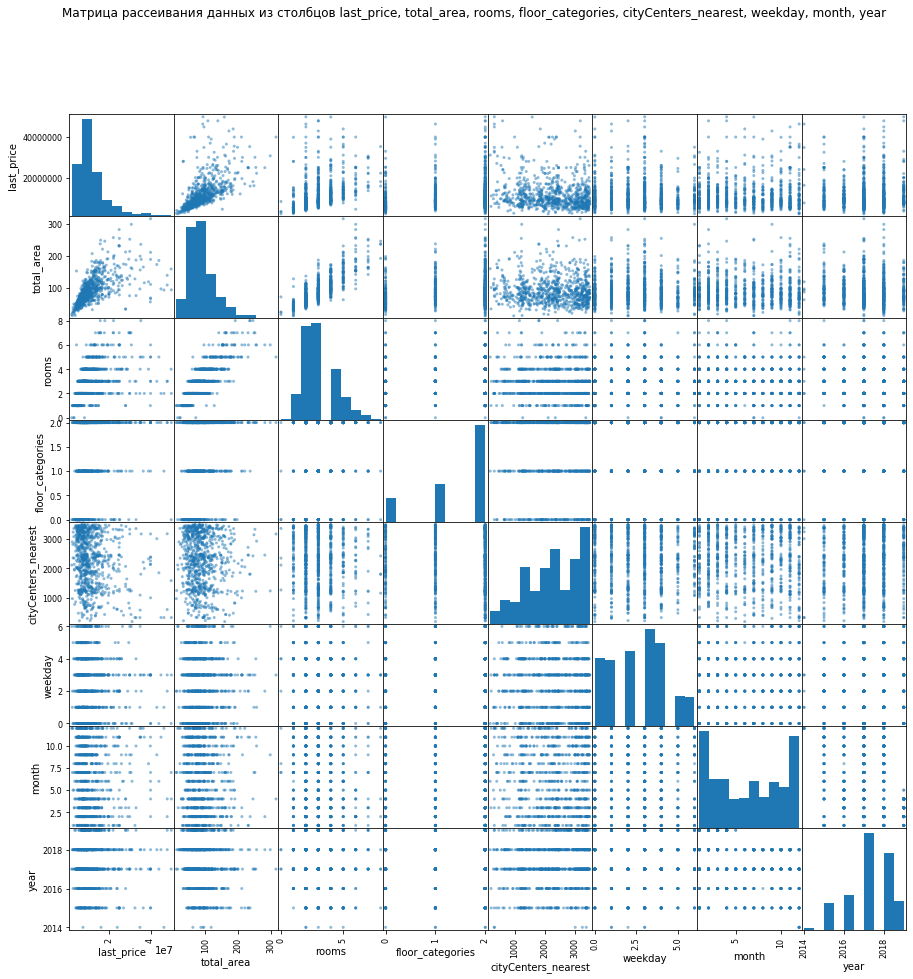

In [46]:
# Определим зависимость цены квартиры в центра Петербурга от площади, 
# количества комнат, этажа, расстояния до центра города, даты.
# Создадим срез столбцов для анализа.
spb_data_center_corrs = spb_data_center[['last_price',
                                         'total_area',
                                         'rooms',
                                         'floor_categories',
                                         'cityCenters_nearest',
                                         'weekday',
                                         'month',
                                         'year']]
pd.plotting.scatter_matrix(spb_data_center_corrs, figsize=(15,15))
plt.suptitle('Матрица рассеивания данных из столбцов' +
             ' last_price, total_area, rooms, floor_categories,' + 
             ' cityCenters_nearest, weekday, month, year')
display(spb_data_center_corrs.corr())

<p><u><strong>Анализ влияния факторов на цену квартиры в центре Санкт-Петербурга</strong></u></p>
<br/> Анализ матрицы рассеивания, а также коэффициентов корреляции Пирсона показал:
<br/><li>Существует прямая зависимость цены квартиры от её площади, но уже не такая сильная как в случае с квартирами в среднем по Санкт-Петербургу.</li>
<br/><li>Существует прямая связь между ценой квартиры и количеством комнат. Однако она не слишком сильная. Более того, коэффициент корреляции меньше на 0,1, чем в среднем по Санкт-Петербургу.</li>
<br/><li>Существует крайне незначительная прямая связь между ценой квартиры и её этажем. В центре Петербурга она незначительно выше, чем в среднем по городу.</li>
<br/><li>Существует слабая обратная связь между ценой квартиры и её расстоянием до центра. Более того коэффициент корреляции меньше на 0,12, чем в среднем по Санкт-Петербургу.</li>
<br/><li>Связь между ценой квартиры и датой размещения объявления (будь то днем, месяцем или годом) практически отсутствует.</li>

<p><u><strong>Вывод:</strong></u></p> Определяющим фактором в формировании цены квартиры, находящейся в центре Санкт-Петербурга является её площадь. Также на ценообразование может повлиять количество комнат. Незначительно на образование цены влияет расстояние до центра города. В незначительной степени на цену квартиры может повлиять этаж, на котором она расположена. Связь между ценой квартиры и датой размещения объявления (будь то днем, месяцем или годом) практически отсутствует.
<br/>Стоит отметить различия во влиянии факторов на цену квартир в центре Санкт-Петербурга и цену квартир в среднем по Санкт-Петербургу:
<br/><li>Зависимость цены квартиры от её площади (и от количества комнат) в центре города не такая сильная как в случае с квартирами в среднем по Санкт-Петербургу. Это может объясняться тем, что в формирование цены на квартиру в центре города "вмешивается" культурная ценность квартиры, её планировка, наличие предметов старины. Стоит заметить, что практически весь центр Санкт-Петербурга является историческим и имеет большую площадь. А в среднем дата постройки зданий в центре - 19 век (https://www.cian.ru/stati-10-otlichij-rynkov-zhilja-moskvy-i-sankt-peterburga-218316/). Это, конечно же, тоже учитывается при формировании цены.</li>
<br/><li>В центре Петербурга связь между ценой квартиры и этажем, на котором она расположена, незначительно выше, чем в среднем по городу. Это может объясняться тем, что в центре Петербурга большое количество дореволюционных зданий, не оснащенных лифтом ввиду небольшой этажности, но при этом имеющих высокие лестничные пролеты. Продавцы и покупатели чуть более чаще учитывают этот фактор, чем в среднем по городу (так, в спальных районах наличием лифта никого не удивишь, и, как следствие, этаж квартиры играет меньшую роль при формировании цены).</li>
<br/><li>Расстояние до центра города играет чуть меньшую роль при образовании цены квартир, находящихся в центре города, чем в среднем по Санкт-Петербургу. Это довольно логично и не требует объяснения.</li>

## Общий вывод

Данная проектная работа показала, каким разнообразным является рынок жилья в Санкт-Петербурге и его окрестностях. Так, например, квартира может быть продана за 1 день, а может за 4 года. Разница в цене, площади, высоте потолков может достигать поначалу невероятных значений. Отразим основые выводы исследования.
<p><u><strong>Основные выводы исследования</strong></u></p>
<strong>Данные по Санкт-Петербургу:</strong>
<br/><li>Медианная цена квартиры составляет 4 600 000 руб.</li>
<br/><li>Среди 10 наиболее упоминаемых объявлений о продаже квартир чаще всего встречаются квартиры в Санкт-Петербурге. Реже всего &ndash; в Выборге. Эти же населенные пункты занимают первое и десятое место по средней цене за квадратный метр жилья: 112264 руб./м<sup>2</sup> и 58141 руб./м<sup>2</sup> соответственно.</li>
<br/><li>Обычно квартиру продают за 95 дней.</li>
<br/><li>Определяющим фактором в формировании цены квартиры в большей степени является её площадь. Также на ценообразование может повлиять количество комнат и расстояние до центра города. В незначительной степени на цену квартиры может повлиять этаж, на котором она расположена. Дата размещения объявления не влияет на цену квартиры. </li>
<strong>Данные по центру Санкт-Петербурга:</strong>
<br/><li>Радиус центра города составляет предположительно 4 км.</li>
<br/><li>Медианная цена квартиры составляет 9 400 000 руб.</li>
<br/><li>Цена квадратного метра жилья составляет 133 293 руб.</li>
<br/><li>Обычно квартиру продают за 134 дня.</li>
<br/><li>Определяющим фактором в формировании цены квартиры в большей степени является её площадь, однако её влияние на цену меньше, чем для квартир по Петербургу в целом. Предположительно это происходит из-за особенностей каждой конкретной квартиры. Также на ценообразование может повлиять количество комнат и расстояние до центра города; эти параметры также меньше влияют на цену, сравнивая с данными по Петербургу в целом. В незначительной степени на цену квартиры может повлиять этаж, на котором она расположена. При этом в центре города этаж квартиры больше влияет на цену, чем по Петербургу в целом. Возможно это обусловлено высокими лестничными пролётами и относительно частым отсутствием лифтов в домах центральной части города. Дата размещения объявления не влияет на цену квартиры. </li>